In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base = pd.read_csv('Catalogo_2005_2022_headers_vartimeINT64.csv')
gardner_dec = pd.read_csv('GK_declustered.csv')
gruenthal_dec = pd.read_csv('GRU_declustered.csv')
uhrhammer_dec = pd.read_csv('URH_declustered.csv')

In [3]:
def calc_fmd(mag):
    mag = mag[mag != -np.inf]
    mag_max = np.ceil(10 * max(mag)) / 10
    mag_min = np.floor(10 * min(mag)) / 10
    mag_bin = np.around(np.arange(mag_min - 0.1, mag_max + 0.2, 0.1), 1)
    num = np.histogram(mag, mag_bin)[0]
    cum_num = np.cumsum(num[::-1])[::-1]
    return mag_bin[1:], num, cum_num

mag_bin_base, num_base, cum_num_base = calc_fmd(base['magnitude'])
mag_bin_gardner, num_gardner, cum_num_gardner = calc_fmd(gardner_dec['magnitude'])
mag_bin_gruenthal, num_gruenthal, cum_num_gruenthal = calc_fmd(gruenthal_dec['magnitude'])
mag_bin_uhrhammer, num_uhrhammer, cum_num_uhrhammer = calc_fmd(uhrhammer_dec['magnitude'])

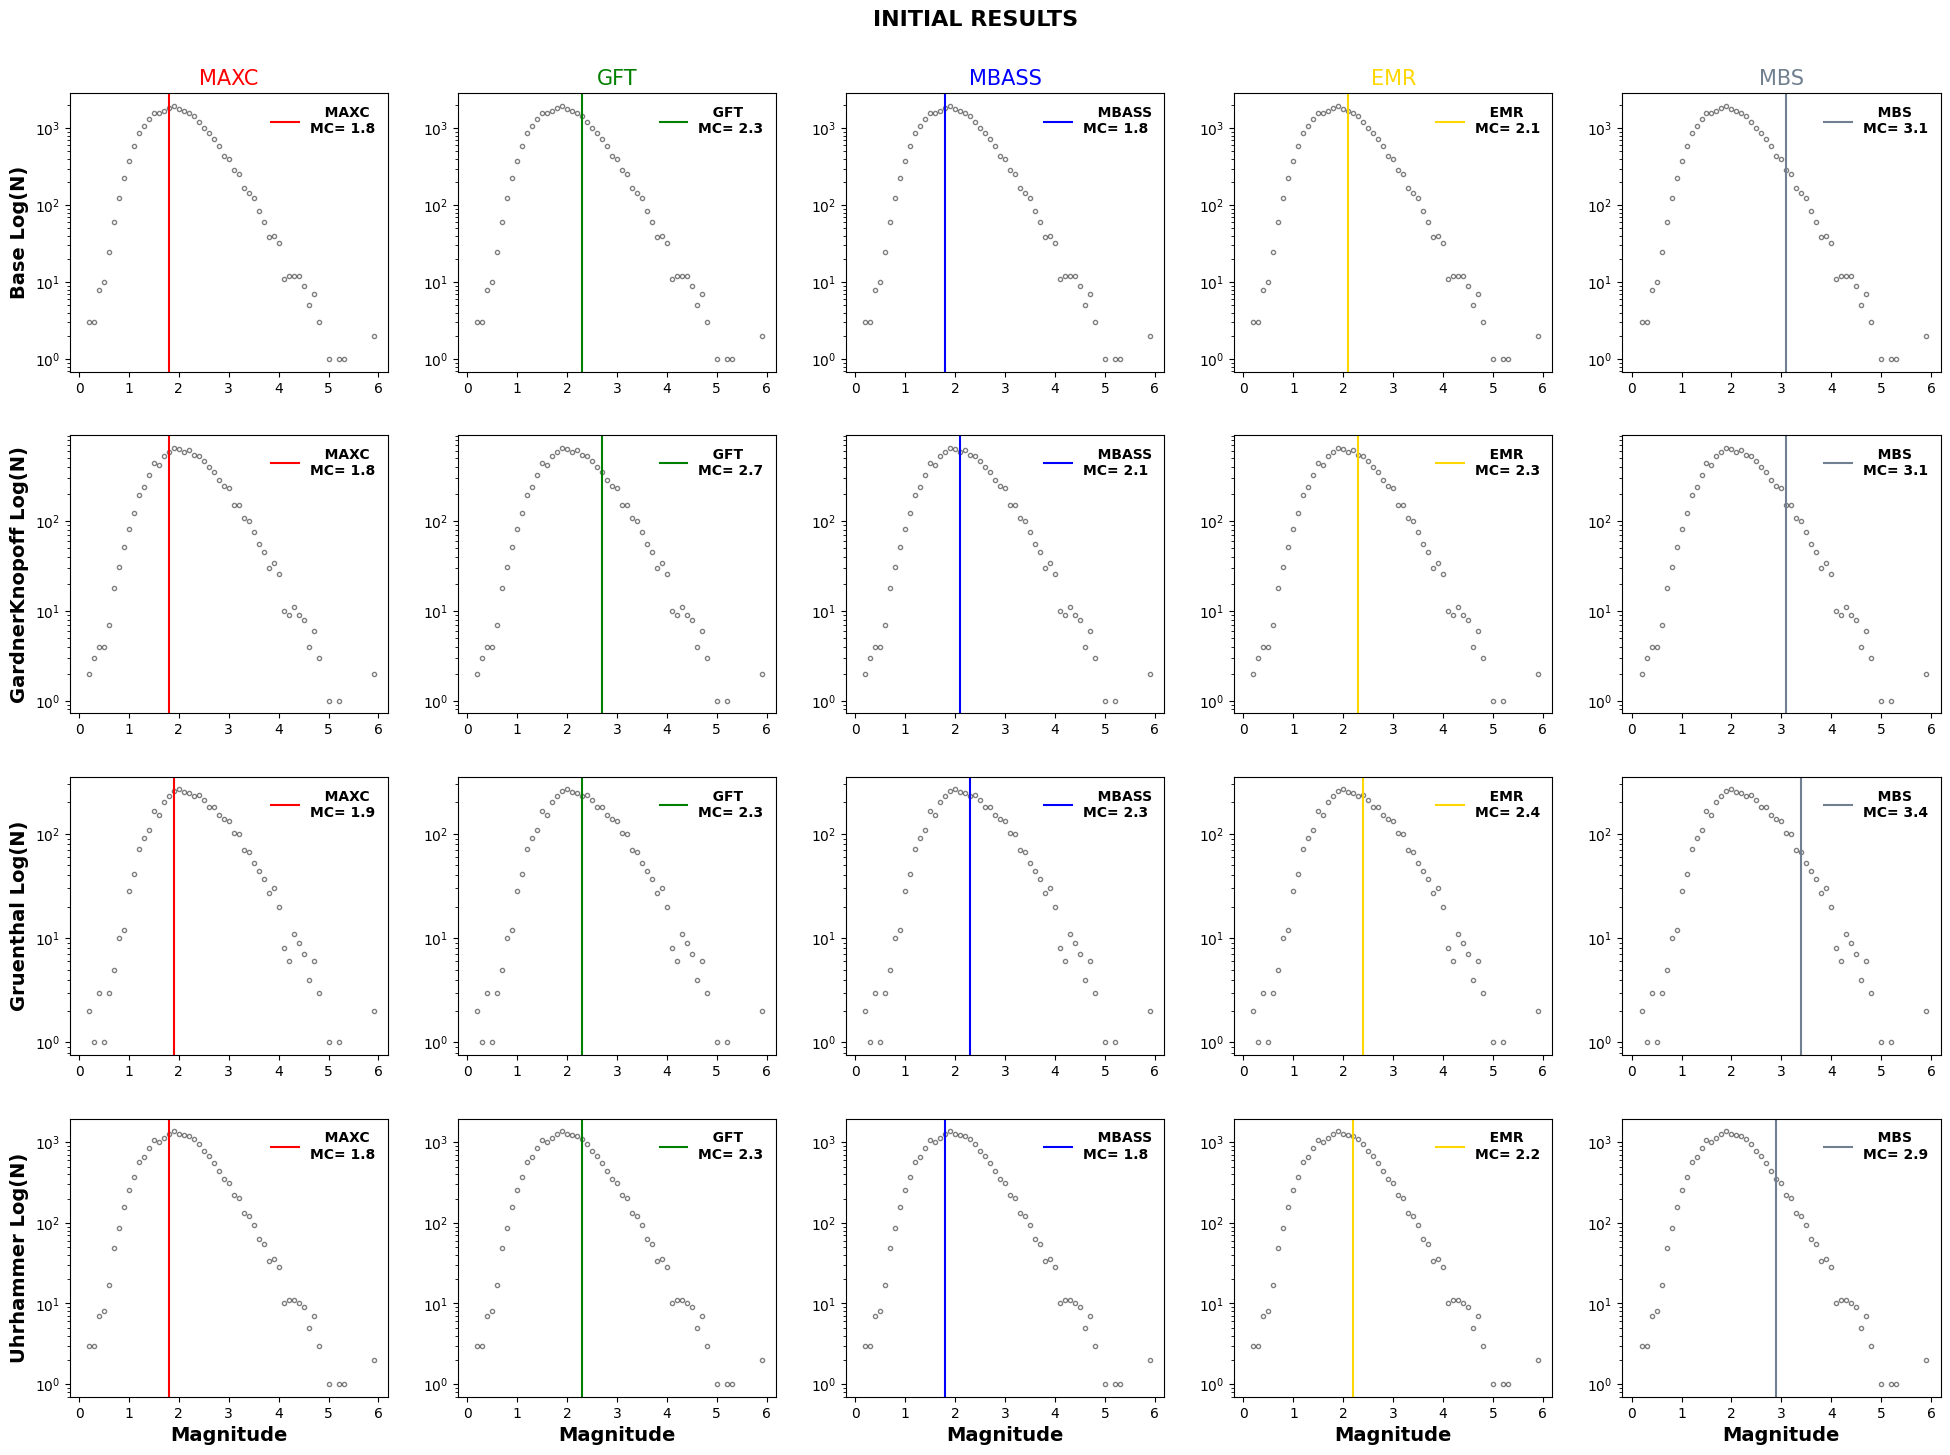

In [4]:
# SINGLE COMPUTATION FINALE
base_MAXC = 1.8
base_GFT = 2.3
base_MBASS = 1.8
base_EMR = 2.1
base_MBS = 3.1

gardner_MAXC = 1.8
gardner_GFT = 2.7
gardner_MBASS = 2.1
gardner_EMR = 2.3
gardner_MBS = 3.1

gruenthal_MAXC = 1.9
gruenthal_GFT = 2.3
gruenthal_MBASS = 2.3
gruenthal_EMR = 2.4
gruenthal_MBS = 3.4

uhrhammer_MAXC = 1.8
uhrhammer_GFT = 2.3
uhrhammer_MBASS = 1.8
uhrhammer_EMR = 2.2
uhrhammer_MBS = 2.9


red_dot_values = [base_MAXC,      base_GFT,      base_MBASS,      base_EMR,      base_MBS,
                  gardner_MAXC,   gardner_GFT,   gardner_MBASS,   gardner_EMR,   gardner_MBS,
                  gruenthal_MAXC, gruenthal_GFT, gruenthal_MBASS, gruenthal_EMR, gruenthal_MBS,
                  uhrhammer_MAXC, uhrhammer_GFT, uhrhammer_MBASS, uhrhammer_EMR, uhrhammer_MBS]

titles = ['MAXC', 'GFT', 'MBASS', 'EMR', 'MBS']
column_colors = ['red', 'green', 'blue', 'gold', 'slategray']


plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=10.6, wspace=1.5)


num_rows = 4
num_cols = 5


legend_labels = {
    'MAXC': 'red',
    'GFT': 'green',
    'MBASS': 'blue',
    'EMR': 'gold',
    'MBS': 'slategray'
}


for i in range(num_rows):
    for j in range(num_cols):
        
        index = i * num_cols + j
        
       
        plt.subplot(num_rows, num_cols, index + 1)
        
        
        if index < 5:
            mag_bin, num, cum_num = mag_bin_base, num_base, cum_num_base
            data_label = 'OG'
        elif index < 10:
            mag_bin, num, cum_num = mag_bin_gardner, num_gardner, cum_num_gardner
            data_label = 'GK'
        elif index < 15:
            mag_bin, num, cum_num = mag_bin_gruenthal, num_gruenthal, cum_num_gruenthal
            data_label = 'GR'
        else:
            mag_bin, num, cum_num = mag_bin_uhrhammer, num_uhrhammer, cum_num_uhrhammer
            data_label = 'UH'
        
        
        plt.plot(mag_bin, num, 'o', markersize=3, linestyle='none', color='gray', label=data_label, markerfacecolor='none', markeredgecolor='black', alpha=0.5)

        
        indices_of_specific_points = np.where(mag_bin == red_dot_values[index])[0]
        

        
        dot_color = column_colors[j]
        line_color = column_colors[j]
        
        #plt.axvline(x=red_dot_values[index] + dashed_line_values[index], color=line_color, linestyle='--', linewidth=1.5)
        #plt.axvline(x=red_dot_values[index] - dashed_line_values[index], color=line_color, linestyle='--', linewidth=1.5)
        plt.axvline(x=red_dot_values[index], color=dot_color)
        plt.yscale('log')
        
     
        #plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
        fontsize=14
        
        if i == 0:
            plt.title(titles[j], color= dot_color, fontsize = 15)
       
        if i == num_rows - 1:
            plt.xlabel('Magnitude', fontsize=fontsize,fontweight='semibold')
        
    
        if j == 0:
            if i == 0:
                plt.ylabel('Base Log(N)', fontsize=fontsize,fontweight='semibold')
            elif i == 1:
                plt.ylabel('GardnerKnopoff Log(N)', fontsize=fontsize,fontweight='semibold')
            elif i == 2:
                plt.ylabel('Gruenthal Log(N)', fontsize=fontsize,fontweight='semibold')
            else:
                plt.ylabel('Uhrhammer Log(N)', fontsize=fontsize,fontweight='semibold')
                

        legend_handles = [plt.Line2D([0], [0], markersize=30, color=dot_color)]
                          #plt.Line2D([0], [0], color=line_color, linestyle='--', linewidth=1.5)]
        legend_labels = ['   '+str(titles[j])+'\n'+'MC= '+str(red_dot_values[index])]
        legend_properties = {'weight':'bold'}

        plt.legend(legend_handles, legend_labels, loc='upper right', frameon=False, fontsize=11, prop=legend_properties)

plt.suptitle('INITIAL RESULTS', fontsize=16, fontweight='bold')
plt.tight_layout(pad=2.5)
plt.show()

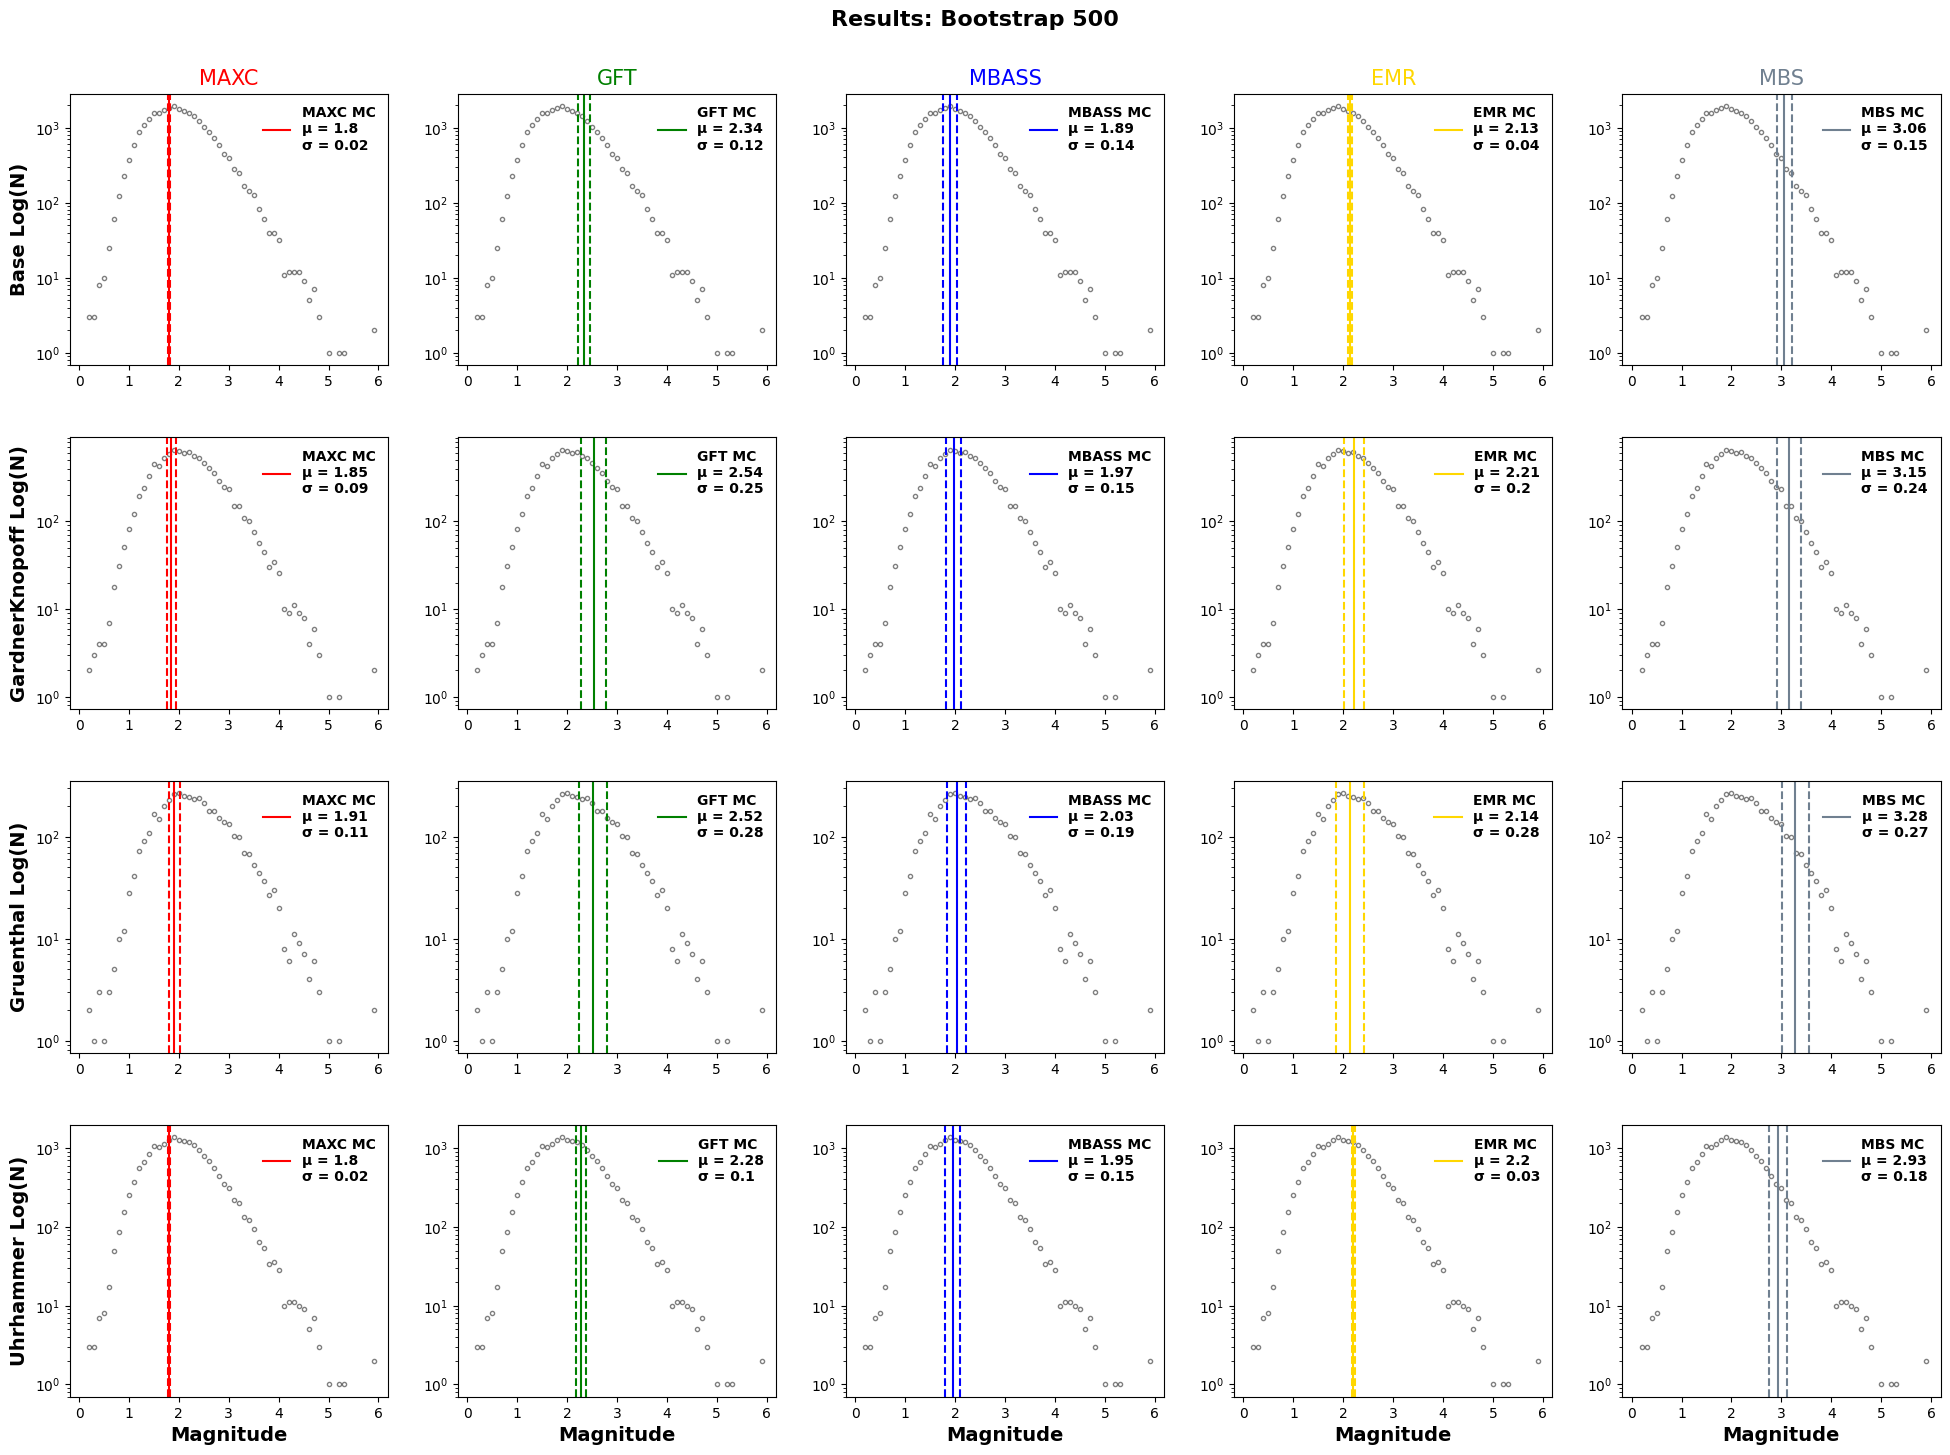

In [5]:
# 500 BOOTSTRAP FINALE

# Base
base_MAXC_mean = 1.80
base_MAXC_dev = 0.02
base_GFT_mean = 2.34
base_GFT_dev = 0.12
base_MBASS_mean = 1.89
base_MBASS_dev = 0.14
base_EMR_mean = 2.13
base_EMR_dev = 0.04
base_MBS_mean = 3.06
base_MBS_dev = 0.15

# Gardner
gardner_MAXC_mean = 1.85
gardner_MAXC_dev = 0.09
gardner_GFT_mean = 2.54
gardner_GFT_dev = 0.25
gardner_MBASS_mean = 1.97
gardner_MBASS_dev = 0.15
gardner_EMR_mean = 2.21
gardner_EMR_dev = 0.20
gardner_MBS_mean = 3.15
gardner_MBS_dev = 0.24

# Gruenthal
gruenthal_MAXC_mean = 1.91
gruenthal_MAXC_dev = 0.11
gruenthal_GFT_mean = 2.52
gruenthal_GFT_dev = 0.28
gruenthal_MBASS_mean = 2.03
gruenthal_MBASS_dev = 0.19
gruenthal_EMR_mean = 2.14
gruenthal_EMR_dev = 0.28
gruenthal_MBS_mean = 3.28
gruenthal_MBS_dev = 0.27

# Uhrhammer
uhrhammer_MAXC_mean = 1.80
uhrhammer_MAXC_dev = 0.02
uhrhammer_GFT_mean = 2.28
uhrhammer_GFT_dev = 0.10
uhrhammer_MBASS_mean = 1.95
uhrhammer_MBASS_dev = 0.15
uhrhammer_EMR_mean = 2.20
uhrhammer_EMR_dev = 0.03
uhrhammer_MBS_mean = 2.93
uhrhammer_MBS_dev = 0.18


red_dot_values = [base_MAXC_mean,      base_GFT_mean,      base_MBASS_mean,      base_EMR_mean,      base_MBS_mean,
                  gardner_MAXC_mean,   gardner_GFT_mean,   gardner_MBASS_mean,   gardner_EMR_mean,   gardner_MBS_mean,
                  gruenthal_MAXC_mean, gruenthal_GFT_mean, gruenthal_MBASS_mean, gruenthal_EMR_mean, gruenthal_MBS_mean,
                  uhrhammer_MAXC_mean, uhrhammer_GFT_mean, uhrhammer_MBASS_mean, uhrhammer_EMR_mean, uhrhammer_MBS_mean]


dashed_line_values = [base_MAXC_dev,      base_GFT_dev,      base_MBASS_dev,      base_EMR_dev,      base_MBS_dev,
                      gardner_MAXC_dev,   gardner_GFT_dev,   gardner_MBASS_dev,   gardner_EMR_dev,   gardner_MBS_dev,
                      gruenthal_MAXC_dev, gruenthal_GFT_dev, gruenthal_MBASS_dev, gruenthal_EMR_dev, gruenthal_MBS_dev,
                      uhrhammer_MAXC_dev, uhrhammer_GFT_dev, uhrhammer_MBASS_dev, uhrhammer_EMR_dev, uhrhammer_MBS_dev]

titles = ['MAXC', 'GFT', 'MBASS', 'EMR', 'MBS']
column_colors = ['red', 'green', 'blue', 'gold', 'slategray']


plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=10.6, wspace=1.5)


num_rows = 4
num_cols = 5


legend_labels = {
    'MAXC': 'red',
    'GFT': 'green',
    'MBASS': 'blue',
    'EMR': 'gold',
    'MBS': 'slategray'
}


for i in range(num_rows):
    for j in range(num_cols):

        index = i * num_cols + j
  
        plt.subplot(num_rows, num_cols, index + 1)
        
        if index < 5:
            mag_bin, num, cum_num = mag_bin_base, num_base, cum_num_base
            data_label = 'OG'
        elif index < 10:
            mag_bin, num, cum_num = mag_bin_gardner, num_gardner, cum_num_gardner
            data_label = 'GK'
        elif index < 15:
            mag_bin, num, cum_num = mag_bin_gruenthal, num_gruenthal, cum_num_gruenthal
            data_label = 'GR'
        else:
            mag_bin, num, cum_num = mag_bin_uhrhammer, num_uhrhammer, cum_num_uhrhammer
            data_label = 'UH'
        

        plt.plot(mag_bin, num, 'o', markersize=3, linestyle='none', color='gray', label=data_label, markerfacecolor='none', markeredgecolor='black', alpha=0.5)


        indices_of_specific_points = np.where(mag_bin_base == red_dot_values[index])[0]

        dot_color = column_colors[j]
        line_color = column_colors[j]
        
        plt.axvline(x=red_dot_values[index] + dashed_line_values[index], color=line_color, linestyle='--', linewidth=1.5)
        plt.axvline(x=red_dot_values[index] - dashed_line_values[index], color=line_color, linestyle='--', linewidth=1.5)
        plt.axvline(x=red_dot_values[index], color=dot_color)
        plt.yscale('log')
        

        #plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
        fontsize = 14
        fontweight = 'semibold'
        
        if i == 0:
            plt.title(titles[j], color= dot_color, fontsize = 15)
        # Add the x-label to only the last row of plots
        if i == num_rows - 1:
            plt.xlabel('Magnitude', fontsize=fontsize, fontweight=fontweight)
        
        if j == 0:
            if i == 0:
                plt.ylabel('Base Log(N)', fontsize=fontsize,fontweight='semibold')
            elif i == 1:
                plt.ylabel('GardnerKnopoff Log(N)', fontsize=fontsize,fontweight='semibold')
            elif i == 2:
                plt.ylabel('Gruenthal Log(N)', fontsize=fontsize,fontweight='semibold')
            else:
                plt.ylabel('Uhrhammer Log(N)', fontsize=fontsize,fontweight='semibold')
                
   
        # legend_handles = [plt.Line2D([0], [0], markersize=5, color=dot_color),
        #                   plt.Line2D([0], [0], markersize=5, color=line_color, linestyle='--', linewidth=1)]
        # legend_labels = ['mean: '+str(red_dot_values[index]), 'unc:    '+str(dashed_line_values[index])]

        # plt.legend(legend_handles, legend_labels, loc='upper right',prop = { "size": 8 }, frameon=False)

        legend_handles = [(plt.Line2D([0], [0], markersize=8, color=dot_color)), (plt.Line2D([0], [0], color=line_color, linestyle='--', linewidth=1.5))]
        legend_labels = [str(titles[j])+' MC'+'\n'+'μ = '+str(red_dot_values[index])+'\n'+'σ = '+str(dashed_line_values[index])]
        legend_properties = {'weight':'bold'}

        plt.legend(legend_handles, legend_labels, loc='upper right', frameon=False, fontsize=11, prop=legend_properties)

plt.suptitle('Results: Bootstrap 500', fontsize=16, fontweight='bold')        
plt.tight_layout(pad=2.5)
plt.show()


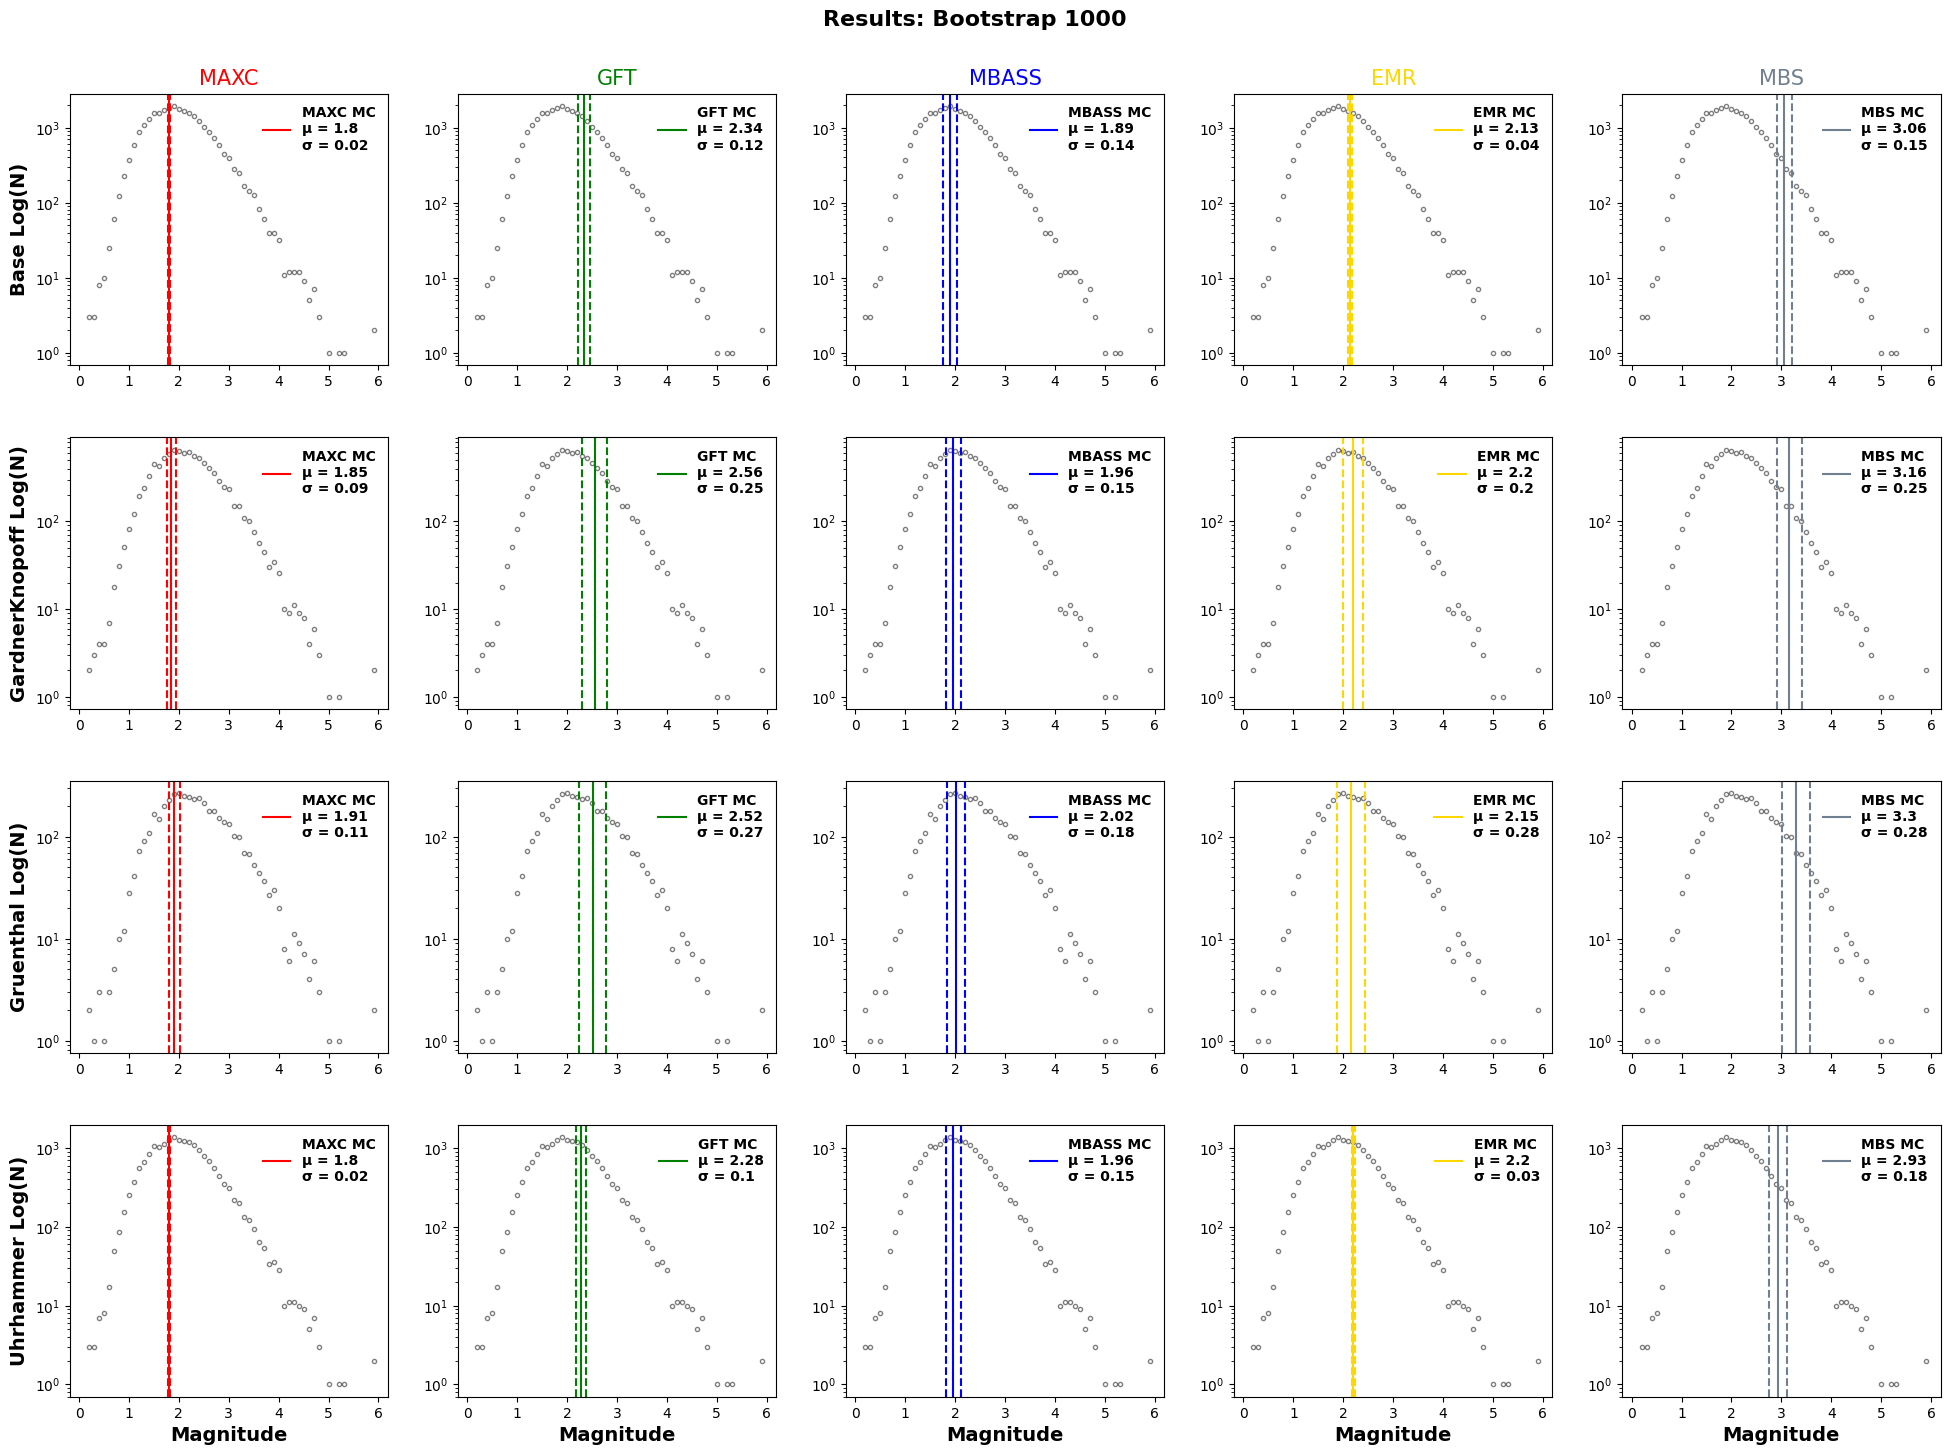

In [6]:
# 1000 BOOTSTRAP FINALE

# Base
base_MAXC_mean = 1.80
base_MAXC_dev = 0.02
base_GFT_mean = 2.34
base_GFT_dev = 0.12
base_MBASS_mean = 1.89
base_MBASS_dev = 0.14
base_EMR_mean = 2.13
base_EMR_dev = 0.04
base_MBS_mean = 3.06
base_MBS_dev = 0.15

# Gardner
gardner_MAXC_mean = 1.85
gardner_MAXC_dev = 0.09
gardner_GFT_mean = 2.56
gardner_GFT_dev = 0.25
gardner_MBASS_mean = 1.96
gardner_MBASS_dev = 0.15
gardner_EMR_mean = 2.20
gardner_EMR_dev = 0.20
gardner_MBS_mean = 3.16
gardner_MBS_dev = 0.25

# Gruenthal
gruenthal_MAXC_mean = 1.91
gruenthal_MAXC_dev = 0.11
gruenthal_GFT_mean = 2.52
gruenthal_GFT_dev = 0.27
gruenthal_MBASS_mean = 2.02
gruenthal_MBASS_dev = 0.18
gruenthal_EMR_mean = 2.15
gruenthal_EMR_dev = 0.28
gruenthal_MBS_mean = 3.30
gruenthal_MBS_dev = 0.28

# Uhrhammer
uhrhammer_MAXC_mean = 1.80
uhrhammer_MAXC_dev = 0.02
uhrhammer_GFT_mean = 2.28
uhrhammer_GFT_dev = 0.10
uhrhammer_MBASS_mean = 1.96
uhrhammer_MBASS_dev = 0.15
uhrhammer_EMR_mean = 2.20
uhrhammer_EMR_dev = 0.03
uhrhammer_MBS_mean = 2.93
uhrhammer_MBS_dev = 0.18



red_dot_values = [base_MAXC_mean,      base_GFT_mean,      base_MBASS_mean,      base_EMR_mean,      base_MBS_mean,
                  gardner_MAXC_mean,   gardner_GFT_mean,   gardner_MBASS_mean,   gardner_EMR_mean,   gardner_MBS_mean,
                  gruenthal_MAXC_mean, gruenthal_GFT_mean, gruenthal_MBASS_mean, gruenthal_EMR_mean, gruenthal_MBS_mean,
                  uhrhammer_MAXC_mean, uhrhammer_GFT_mean, uhrhammer_MBASS_mean, uhrhammer_EMR_mean, uhrhammer_MBS_mean]


dashed_line_values = [base_MAXC_dev,      base_GFT_dev,      base_MBASS_dev,      base_EMR_dev,      base_MBS_dev,
                      gardner_MAXC_dev,   gardner_GFT_dev,   gardner_MBASS_dev,   gardner_EMR_dev,   gardner_MBS_dev,
                      gruenthal_MAXC_dev, gruenthal_GFT_dev, gruenthal_MBASS_dev, gruenthal_EMR_dev, gruenthal_MBS_dev,
                      uhrhammer_MAXC_dev, uhrhammer_GFT_dev, uhrhammer_MBASS_dev, uhrhammer_EMR_dev, uhrhammer_MBS_dev]

titles = ['MAXC', 'GFT', 'MBASS', 'EMR', 'MBS']
column_colors = ['red', 'green', 'blue', 'gold', 'slategray']


plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=10.6, wspace=1.5)


num_rows = 4
num_cols = 5

legend_labels = {
    'MAXC': 'red',
    'GFT': 'green',
    'MBASS': 'blue',
    'EMR': 'gold',
    'MBS': 'slategray'
}


for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        
        # Create a subplot
        plt.subplot(num_rows, num_cols, index + 1)
        
        if index < 5:
            mag_bin, num, cum_num = mag_bin_base, num_base, cum_num_base
            data_label = 'OG'
        elif index < 10:
            mag_bin, num, cum_num = mag_bin_gardner, num_gardner, cum_num_gardner
            data_label = 'GK'
        elif index < 15:
            mag_bin, num, cum_num = mag_bin_gruenthal, num_gruenthal, cum_num_gruenthal
            data_label = 'GR'
        else:
            mag_bin, num, cum_num = mag_bin_uhrhammer, num_uhrhammer, cum_num_uhrhammer
            data_label = 'UH'
        
        plt.plot(mag_bin, num, 'o', markersize=3, linestyle='none', color='gray', label=data_label, markerfacecolor='none', markeredgecolor='black', alpha=0.5)


        indices_of_specific_points = np.where(mag_bin_base == red_dot_values[index])[0]

  
        dot_color = column_colors[j]
        line_color = column_colors[j]
        
        plt.axvline(x=red_dot_values[index] + dashed_line_values[index], color=line_color, linestyle='--', linewidth=1.5)
        plt.axvline(x=red_dot_values[index] - dashed_line_values[index], color=line_color, linestyle='--', linewidth=1.5)
        plt.axvline(x=red_dot_values[index], color=dot_color)
        plt.yscale('log')
  
        #plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
        
        fontsize = 14
        fontweight = 'semibold'
        
        if i == 0:
            plt.title(titles[j], color= dot_color, fontsize = 15)
        # Add the x-label to only the last row of plots
        if i == num_rows - 1:
            plt.xlabel('Magnitude', fontsize=fontsize, fontweight=fontweight)
        
   
        if j == 0:
            if i == 0:
                plt.ylabel('Base Log(N)', fontsize=fontsize,fontweight='semibold')
            elif i == 1:
                plt.ylabel('GardnerKnopoff Log(N)', fontsize=fontsize,fontweight='semibold')
            elif i == 2:
                plt.ylabel('Gruenthal Log(N)', fontsize=fontsize,fontweight='semibold')
            else:
                plt.ylabel('Uhrhammer Log(N)', fontsize=fontsize,fontweight='semibold')
                
   
        # legend_handles = [plt.Line2D([0], [0], markersize=5, color=dot_color),
        #                   plt.Line2D([0], [0], markersize=5, color=line_color, linestyle='--', linewidth=1)]
        # legend_labels = ['mean: '+str(red_dot_values[index]), 'unc:    '+str(dashed_line_values[index])]

        # plt.legend(legend_handles, legend_labels, loc='upper right',prop = { "size": 8 }, frameon=False)

        legend_handles = [plt.Line2D([0], [0], markersize=30, color=dot_color),
                          plt.Line2D([0], [0], color=line_color, linestyle='--', linewidth=1.5)]
        legend_labels = [str(titles[j])+' MC'+'\n'+'μ = '+str(red_dot_values[index])+'\n'+'σ = '+str(dashed_line_values[index])]
        legend_properties = {'weight':'bold'}

        plt.legend(legend_handles, legend_labels, loc='upper right', frameon=False, fontsize=11, prop=legend_properties)

plt.suptitle('Results: Bootstrap 1000', fontsize=16, fontweight='bold')        
plt.tight_layout(pad=2.5)
plt.show()

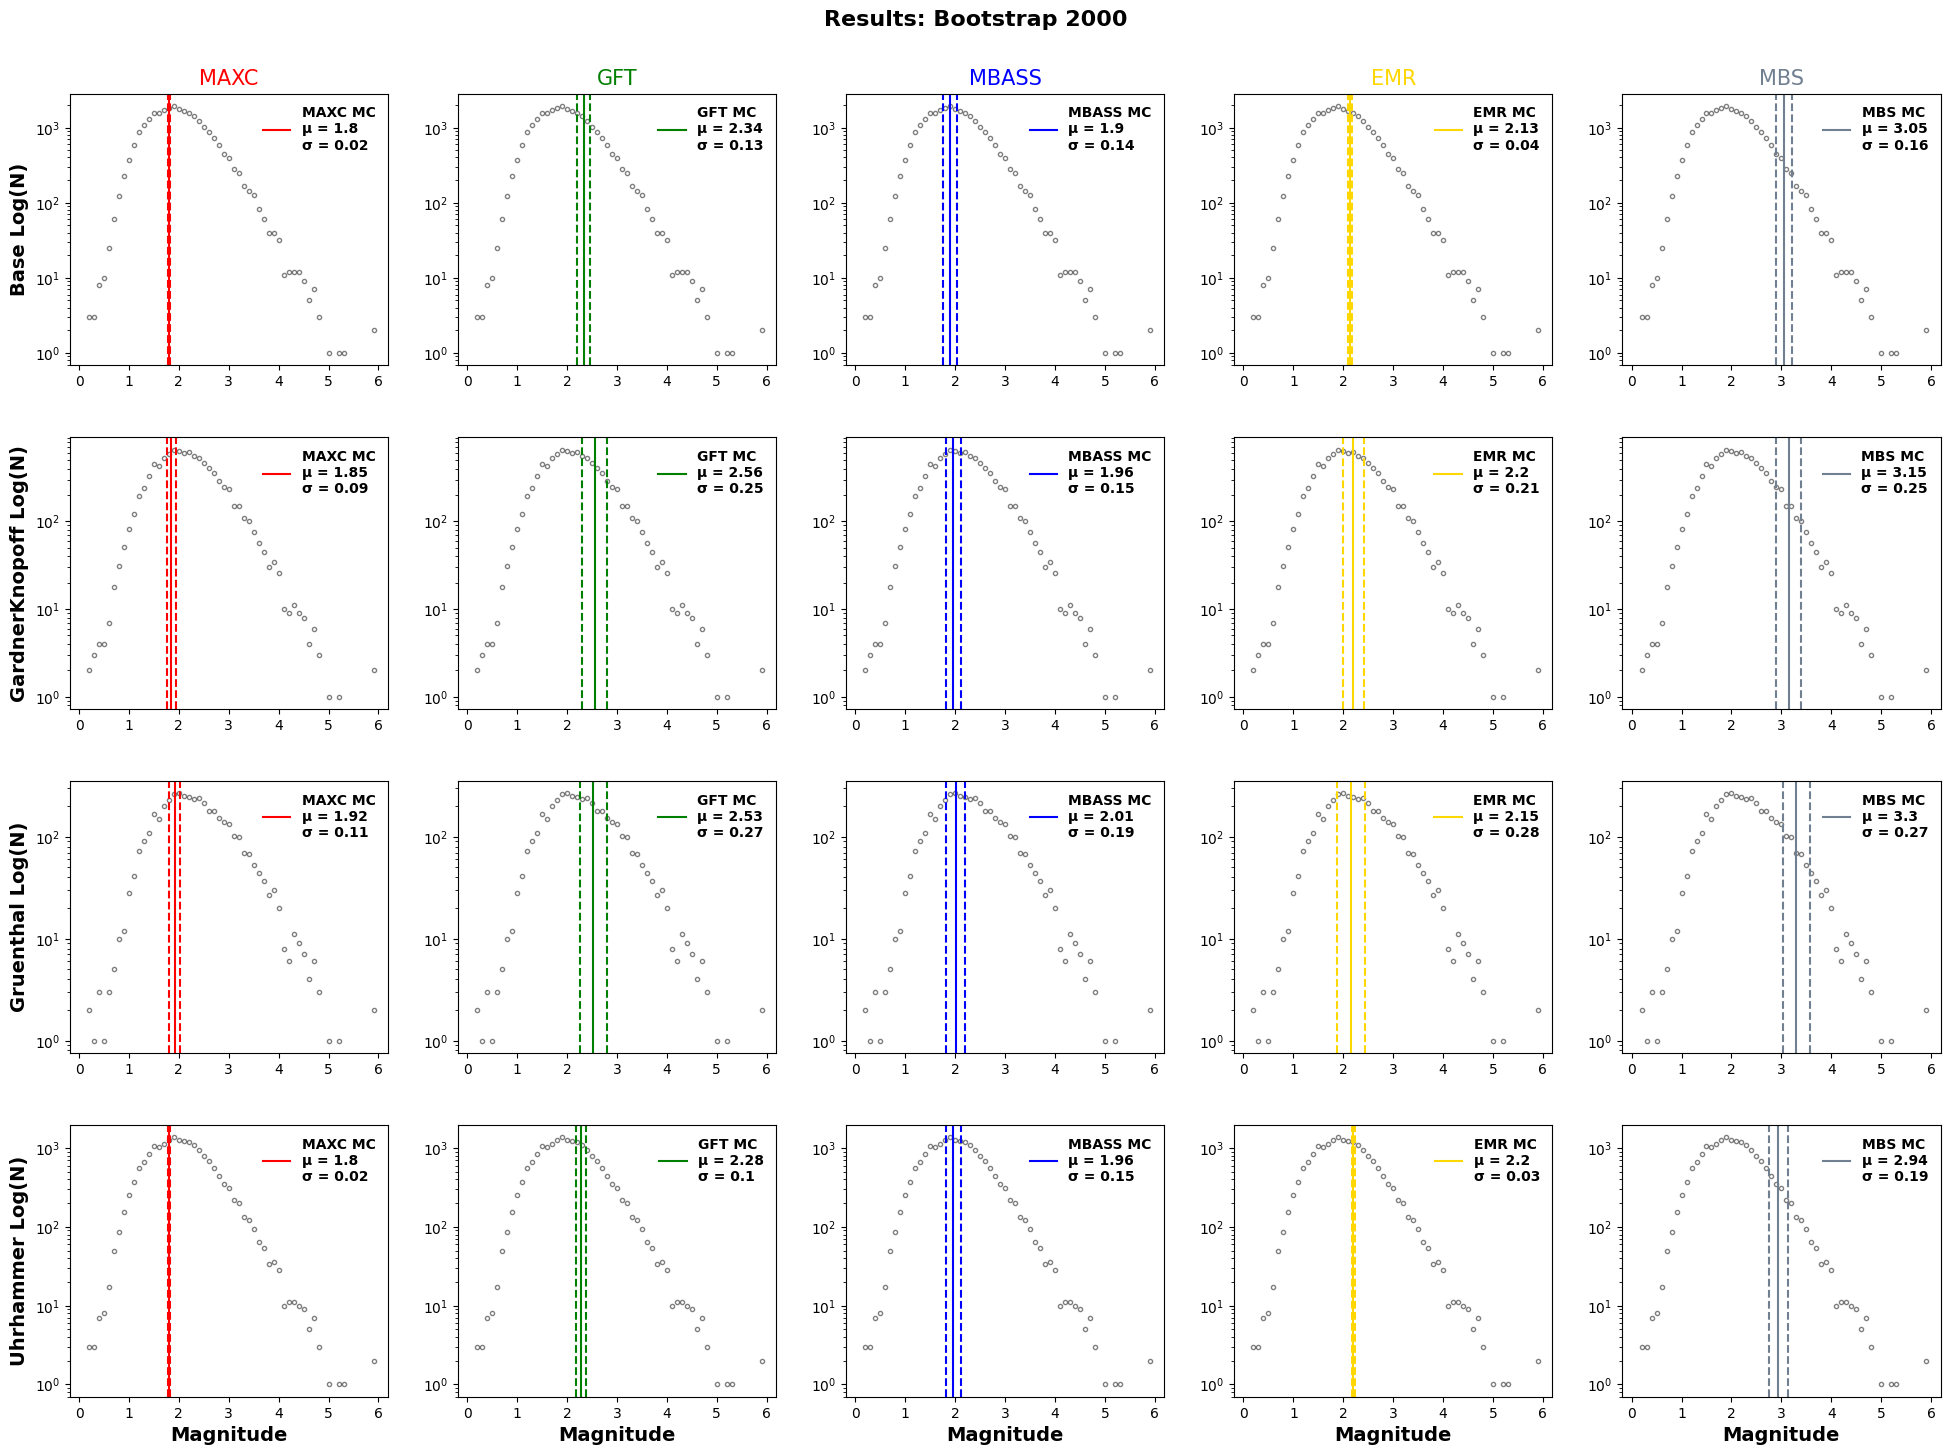

In [7]:
# 2000 BOOTSTRAP FINALE

# Base
base_MAXC_mean = 1.80
base_MAXC_dev = 0.02
base_GFT_mean = 2.34
base_GFT_dev = 0.13
base_MBASS_mean = 1.90
base_MBASS_dev = 0.14
base_EMR_mean = 2.13
base_EMR_dev = 0.04
base_MBS_mean = 3.05
base_MBS_dev = 0.16

# Gardner
gardner_MAXC_mean = 1.85
gardner_MAXC_dev = 0.09
gardner_GFT_mean = 2.56
gardner_GFT_dev = 0.25
gardner_MBASS_mean = 1.96
gardner_MBASS_dev = 0.15
gardner_EMR_mean = 2.20
gardner_EMR_dev = 0.21
gardner_MBS_mean = 3.15
gardner_MBS_dev = 0.25

# Gruenthal
gruenthal_MAXC_mean = 1.92
gruenthal_MAXC_dev = 0.11
gruenthal_GFT_mean = 2.53
gruenthal_GFT_dev = 0.27
gruenthal_MBASS_mean = 2.01
gruenthal_MBASS_dev = 0.19
gruenthal_EMR_mean = 2.15
gruenthal_EMR_dev = 0.28
gruenthal_MBS_mean = 3.30
gruenthal_MBS_dev = 0.27

# Uhrhammer
uhrhammer_MAXC_mean = 1.80
uhrhammer_MAXC_dev = 0.02
uhrhammer_GFT_mean = 2.28
uhrhammer_GFT_dev = 0.10
uhrhammer_MBASS_mean = 1.96
uhrhammer_MBASS_dev = 0.15
uhrhammer_EMR_mean = 2.20
uhrhammer_EMR_dev = 0.03
uhrhammer_MBS_mean = 2.94
uhrhammer_MBS_dev = 0.19



red_dot_values = [base_MAXC_mean,      base_GFT_mean,      base_MBASS_mean,      base_EMR_mean,      base_MBS_mean,
                  gardner_MAXC_mean,   gardner_GFT_mean,   gardner_MBASS_mean,   gardner_EMR_mean,   gardner_MBS_mean,
                  gruenthal_MAXC_mean, gruenthal_GFT_mean, gruenthal_MBASS_mean, gruenthal_EMR_mean, gruenthal_MBS_mean,
                  uhrhammer_MAXC_mean, uhrhammer_GFT_mean, uhrhammer_MBASS_mean, uhrhammer_EMR_mean, uhrhammer_MBS_mean]


dashed_line_values = [base_MAXC_dev,      base_GFT_dev,      base_MBASS_dev,      base_EMR_dev,      base_MBS_dev,
                      gardner_MAXC_dev,   gardner_GFT_dev,   gardner_MBASS_dev,   gardner_EMR_dev,   gardner_MBS_dev,
                      gruenthal_MAXC_dev, gruenthal_GFT_dev, gruenthal_MBASS_dev, gruenthal_EMR_dev, gruenthal_MBS_dev,
                      uhrhammer_MAXC_dev, uhrhammer_GFT_dev, uhrhammer_MBASS_dev, uhrhammer_EMR_dev, uhrhammer_MBS_dev]

titles = ['MAXC', 'GFT', 'MBASS', 'EMR', 'MBS']
column_colors = ['red', 'green', 'blue', 'gold', 'slategray']


plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=10.6, wspace=1.5)

num_rows = 4
num_cols = 5


legend_labels = {
    'MAXC': 'red',
    'GFT': 'green',
    'MBASS': 'blue',
    'EMR': 'gold',
    'MBS': 'slategray'
}


for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        
        plt.subplot(num_rows, num_cols, index + 1)
        
        if index < 5:
            mag_bin, num, cum_num = mag_bin_base, num_base, cum_num_base
            data_label = 'OG'
        elif index < 10:
            mag_bin, num, cum_num = mag_bin_gardner, num_gardner, cum_num_gardner
            data_label = 'GK'
        elif index < 15:
            mag_bin, num, cum_num = mag_bin_gruenthal, num_gruenthal, cum_num_gruenthal
            data_label = 'GR'
        else:
            mag_bin, num, cum_num = mag_bin_uhrhammer, num_uhrhammer, cum_num_uhrhammer
            data_label = 'UH'
        
        plt.plot(mag_bin, num, 'o', markersize=3, linestyle='none', color='gray', label=data_label, markerfacecolor='none', markeredgecolor='black', alpha=0.5)

        indices_of_specific_points = np.where(mag_bin_base == red_dot_values[index])[0]


        dot_color = column_colors[j]
        line_color = column_colors[j]
        
        plt.axvline(x=red_dot_values[index] + dashed_line_values[index], color=line_color, linestyle='--', linewidth=1.5)
        plt.axvline(x=red_dot_values[index] - dashed_line_values[index], color=line_color, linestyle='--', linewidth=1.5)
        plt.axvline(x=red_dot_values[index], color=dot_color)
        plt.yscale('log')

        #plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
        
        fontsize = 14
        fontweight = 'semibold'
        
        if i == 0:
            plt.title(titles[j], color= dot_color, fontsize = 15)
        if i == num_rows - 1:
            plt.xlabel('Magnitude', fontsize=fontsize, fontweight=fontweight)

        if j == 0:
            if i == 0:
                plt.ylabel('Base Log(N)', fontsize=fontsize,fontweight='semibold')
            elif i == 1:
                plt.ylabel('GardnerKnopoff Log(N)', fontsize=fontsize,fontweight='semibold')
            elif i == 2:
                plt.ylabel('Gruenthal Log(N)', fontsize=fontsize,fontweight='semibold')
            else:
                plt.ylabel('Uhrhammer Log(N)', fontsize=fontsize,fontweight='semibold')
                

        # legend_handles = [plt.Line2D([0], [0], markersize=5, color=dot_color),
        #                   plt.Line2D([0], [0], markersize=5, color=line_color, linestyle='--', linewidth=1)]
        # legend_labels = ['mean: '+str(red_dot_values[index]), 'unc:    '+str(dashed_line_values[index])]

        # plt.legend(legend_handles, legend_labels, loc='upper right',prop = { "size": 8 }, frameon=False)



        legend_handles = [plt.Line2D([0], [0], markersize=30, color=dot_color),
                          plt.Line2D([0], [0], color=line_color, linestyle='--', linewidth=1.5)]
        legend_labels = [str(titles[j])+' MC'+'\n'+'μ = '+str(red_dot_values[index])+'\n'+'σ = '+str(dashed_line_values[index])]
        legend_properties = {'weight':'bold'}

        plt.legend(legend_handles, legend_labels, loc='upper right', frameon=False, fontsize=11, prop=legend_properties)
        
plt.suptitle('Results: Bootstrap 2000', fontsize=16, fontweight='bold')        

plt.tight_layout(pad=2.5)
plt.show()

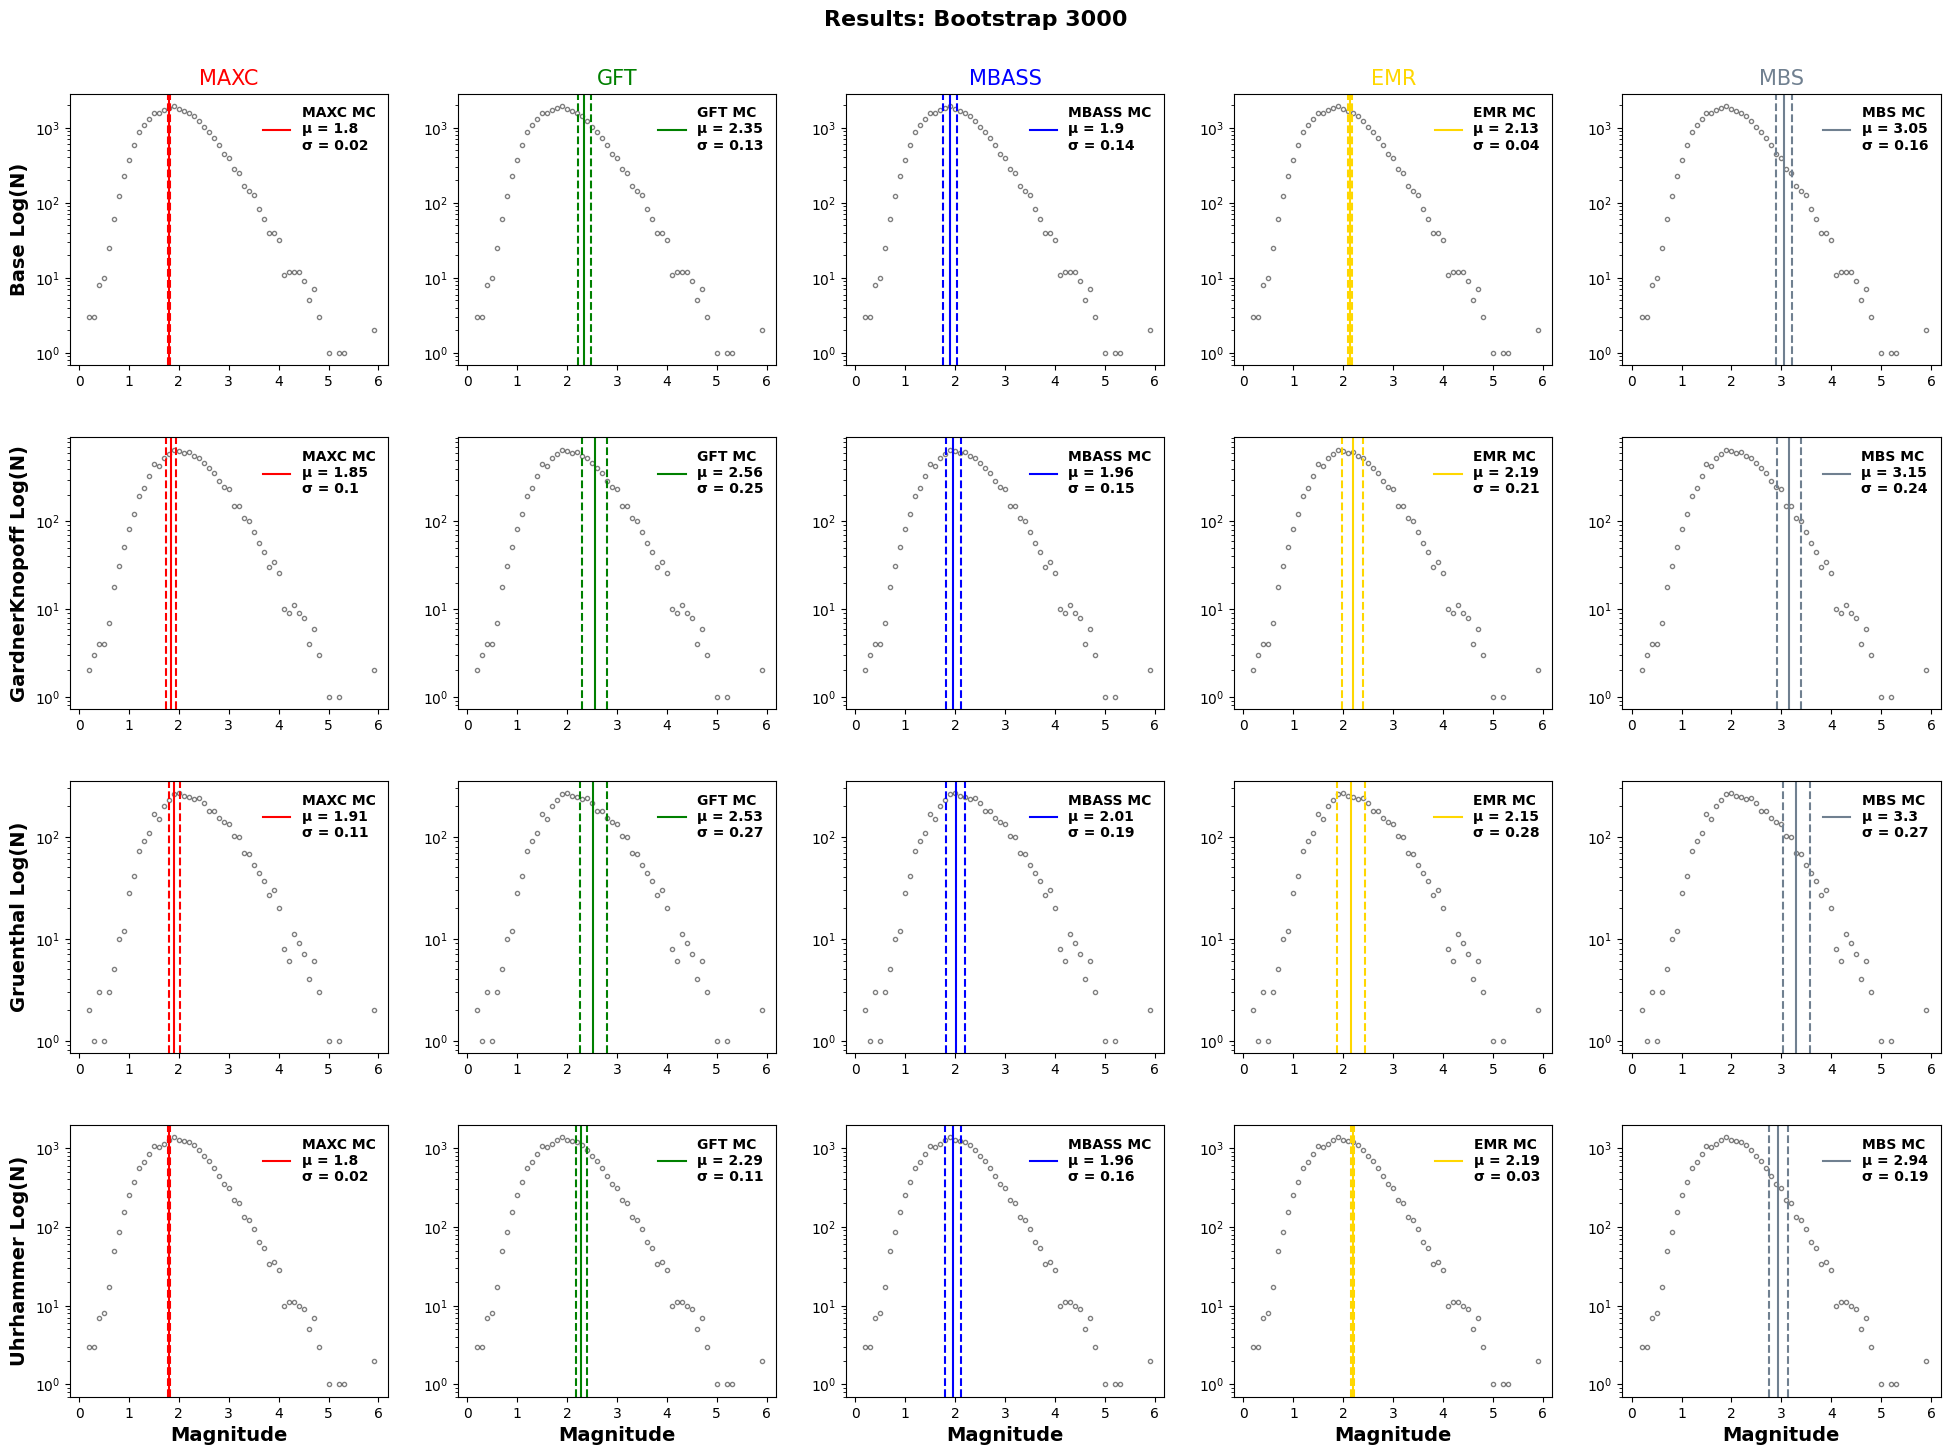

In [8]:
# 3000 BOOTSTRAP FINALE

# Base
base_MAXC_mean = 1.80
base_MAXC_dev = 0.02
base_GFT_mean = 2.35
base_GFT_dev = 0.13
base_MBASS_mean = 1.90
base_MBASS_dev = 0.14
base_EMR_mean = 2.13
base_EMR_dev = 0.04
base_MBS_mean = 3.05
base_MBS_dev = 0.16

# Gardner
gardner_MAXC_mean = 1.85
gardner_MAXC_dev = 0.10
gardner_GFT_mean = 2.56
gardner_GFT_dev = 0.25
gardner_MBASS_mean = 1.96
gardner_MBASS_dev = 0.15
gardner_EMR_mean = 2.19
gardner_EMR_dev = 0.21
gardner_MBS_mean = 3.15
gardner_MBS_dev = 0.24

# Gruenthal
gruenthal_MAXC_mean = 1.91
gruenthal_MAXC_dev = 0.11
gruenthal_GFT_mean = 2.53
gruenthal_GFT_dev = 0.27
gruenthal_MBASS_mean = 2.01
gruenthal_MBASS_dev = 0.19
gruenthal_EMR_mean = 2.15
gruenthal_EMR_dev = 0.28
gruenthal_MBS_mean = 3.30
gruenthal_MBS_dev = 0.27

# Uhrhammer
uhrhammer_MAXC_mean = 1.80
uhrhammer_MAXC_dev = 0.02
uhrhammer_GFT_mean = 2.29
uhrhammer_GFT_dev = 0.11
uhrhammer_MBASS_mean = 1.96
uhrhammer_MBASS_dev = 0.16
uhrhammer_EMR_mean = 2.19
uhrhammer_EMR_dev = 0.03
uhrhammer_MBS_mean = 2.94
uhrhammer_MBS_dev = 0.19


red_dot_values = [base_MAXC_mean,      base_GFT_mean,      base_MBASS_mean,      base_EMR_mean,      base_MBS_mean,
                  gardner_MAXC_mean,   gardner_GFT_mean,   gardner_MBASS_mean,   gardner_EMR_mean,   gardner_MBS_mean,
                  gruenthal_MAXC_mean, gruenthal_GFT_mean, gruenthal_MBASS_mean, gruenthal_EMR_mean, gruenthal_MBS_mean,
                  uhrhammer_MAXC_mean, uhrhammer_GFT_mean, uhrhammer_MBASS_mean, uhrhammer_EMR_mean, uhrhammer_MBS_mean]


dashed_line_values = [base_MAXC_dev,      base_GFT_dev,      base_MBASS_dev,      base_EMR_dev,      base_MBS_dev,
                      gardner_MAXC_dev,   gardner_GFT_dev,   gardner_MBASS_dev,   gardner_EMR_dev,   gardner_MBS_dev,
                      gruenthal_MAXC_dev, gruenthal_GFT_dev, gruenthal_MBASS_dev, gruenthal_EMR_dev, gruenthal_MBS_dev,
                      uhrhammer_MAXC_dev, uhrhammer_GFT_dev, uhrhammer_MBASS_dev, uhrhammer_EMR_dev, uhrhammer_MBS_dev]

titles = ['MAXC', 'GFT', 'MBASS', 'EMR', 'MBS']
column_colors = ['red', 'green', 'blue', 'gold', 'slategray']


plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=10.6, wspace=1.5)


num_rows = 4
num_cols = 5


legend_labels = {
    'MAXC': 'red',
    'GFT': 'green',
    'MBASS': 'blue',
    'EMR': 'gold',
    'MBS': 'slategray'
}


for i in range(num_rows):
    for j in range(num_cols):
   
        index = i * num_cols + j
        

        plt.subplot(num_rows, num_cols, index + 1)
        

        if index < 5:
            mag_bin, num, cum_num = mag_bin_base, num_base, cum_num_base
            data_label = 'OG'
        elif index < 10:
            mag_bin, num, cum_num = mag_bin_gardner, num_gardner, cum_num_gardner
            data_label = 'GK'
        elif index < 15:
            mag_bin, num, cum_num = mag_bin_gruenthal, num_gruenthal, cum_num_gruenthal
            data_label = 'GR'
        else:
            mag_bin, num, cum_num = mag_bin_uhrhammer, num_uhrhammer, cum_num_uhrhammer
            data_label = 'UH'
        
   
        plt.plot(mag_bin, num, 'o', markersize=3, linestyle='none', color='gray', label=data_label, markerfacecolor='none', markeredgecolor='black', alpha=0.5)


        indices_of_specific_points = np.where(mag_bin_base == red_dot_values[index])[0]

        dot_color = column_colors[j]
        line_color = column_colors[j]
        
        plt.axvline(x=red_dot_values[index] + dashed_line_values[index], color=line_color, linestyle='--', linewidth=1.5)
        plt.axvline(x=red_dot_values[index] - dashed_line_values[index], color=line_color, linestyle='--', linewidth=1.5)
        plt.axvline(x=red_dot_values[index], color=dot_color)
        plt.yscale('log')
        
        #plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
        
        fontsize = 14
        fontweight = 'semibold'
        
        if i == 0:
            plt.title(titles[j], color= dot_color, fontsize = 15)
        if i == num_rows - 1:
            plt.xlabel('Magnitude', fontsize=fontsize, fontweight=fontweight)

        if j == 0:
            if i == 0:
                plt.ylabel('Base Log(N)', fontsize=fontsize,fontweight='semibold')
            elif i == 1:
                plt.ylabel('GardnerKnopoff Log(N)', fontsize=fontsize,fontweight='semibold')
            elif i == 2:
                plt.ylabel('Gruenthal Log(N)', fontsize=fontsize,fontweight='semibold')
            else:
                plt.ylabel('Uhrhammer Log(N)', fontsize=fontsize,fontweight='semibold')
                

        # legend_handles = [plt.Line2D([0], [0], markersize=5, color=dot_color),
        #                   plt.Line2D([0], [0], markersize=5, color=line_color, linestyle='--', linewidth=1)]
        # legend_labels = ['mean: '+str(red_dot_values[index]), 'unc:    '+str(dashed_line_values[index])]

        # plt.legend(legend_handles, legend_labels, loc='upper right',prop = { "size": 8 }, frameon=False)


        legend_handles = [plt.Line2D([0], [0], markersize=30, color=dot_color),
                          plt.Line2D([0], [0], color=line_color, linestyle='--', linewidth=1.5)]
        legend_labels = [str(titles[j])+' MC'+'\n'+'μ = '+str(red_dot_values[index])+'\n'+'σ = '+str(dashed_line_values[index])]
        legend_properties = {'weight':'bold'}

        plt.legend(legend_handles, legend_labels, loc='upper right', frameon=False, fontsize=11, prop=legend_properties)

plt.suptitle('Results: Bootstrap 3000', fontsize=16, fontweight='bold')        
plt.tight_layout(pad=2.5)
plt.show()